# Koth Stats

In [47]:
import random


import pandas as pd
import numpy as np


from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure
from matplotlib.axes import Axes
import matplotlib.pyplot as plt

import seaborn as sns

import koth_stats.stats as ks

Helper function to display a ``figure.Figure`` into a ``pyplot`` figure.

In [48]:
def display_figure(fig: Figure, ax: Axes):
    canvas = FigureCanvasAgg(fig)
    canvas.draw()
    rgba = np.asarray(canvas.buffer_rgba())

    ax.imshow(rgba)
    ax.axis('off')


## Examples

### Game 1: Classic random game

Create dummy data

In [49]:
players_g1 = ["Alice", "Bob", "John", "Marco", "Chrichri"]

nb_transitions = int(2 * len(players_g1))

transitions_df_g1 = pd.DataFrame({
    "Name": random.choices(players_g1, k=nb_transitions),
    "Duration": [random.randint(0, 100) for _ in range(nb_transitions)]
})
transitions_df_g1

,Name,Duration
0,Bob,27
1,Marco,1
2,Marco,29
3,John,19
4,Marco,27
5,Alice,34
6,Marco,28
7,Alice,69
8,Chrichri,64
9,Chrichri,10


Initialize the ``KothStatService``

In [50]:
ks_service = ks.KothStatService(players_g1, transitions_df_g1)

Use it to display stats and the score.

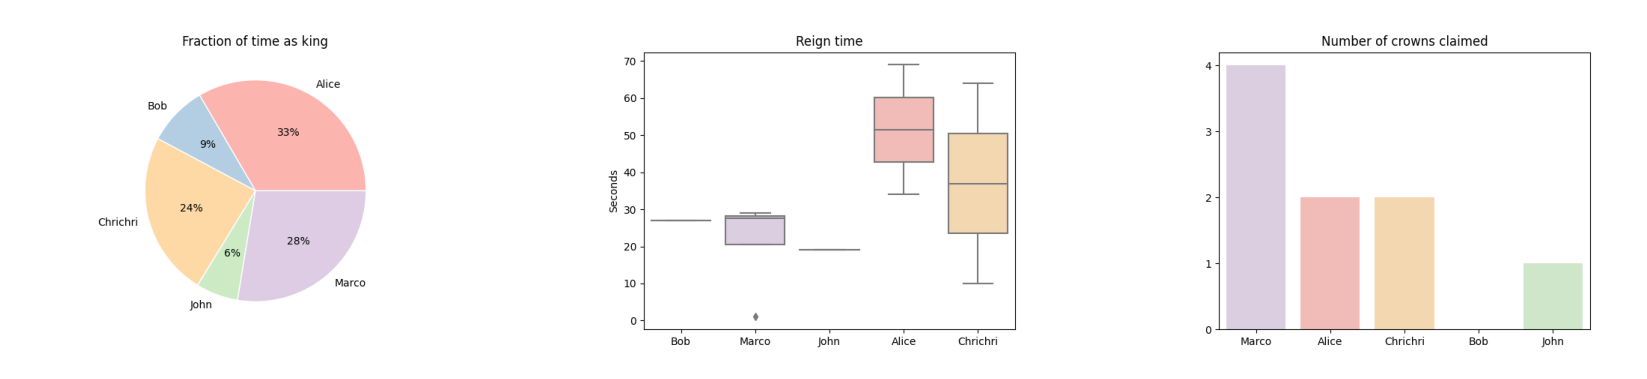

In [51]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(21, 7)
display_figure(ks_service.total_reign_time.plot(include_title=True), ax=axs[0])
display_figure(ks_service.reign_time.plot(include_title=True), ax=axs[1])
display_figure(ks_service.crowns_claimed.plot(include_title=True), ax=axs[2])

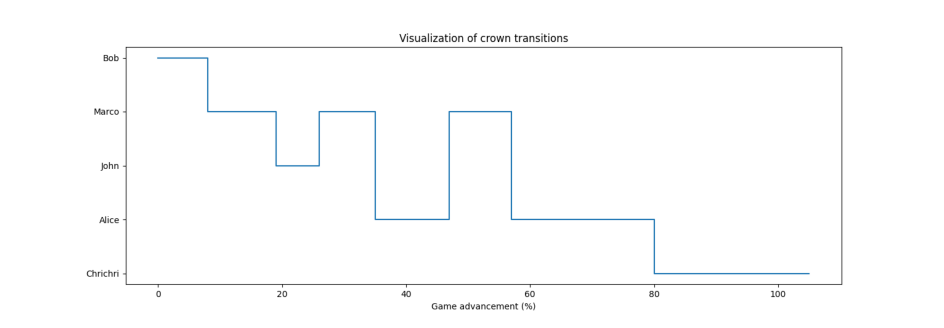

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 4)
display_figure(ks_service.graph_visualization.plot(include_title=True), ax=ax)

In [53]:
points_df = ks_service.points_df()
points_df 

,Points
Name,
Chrichri,93
Alice,89
Marco,65
Bob,21
John,15


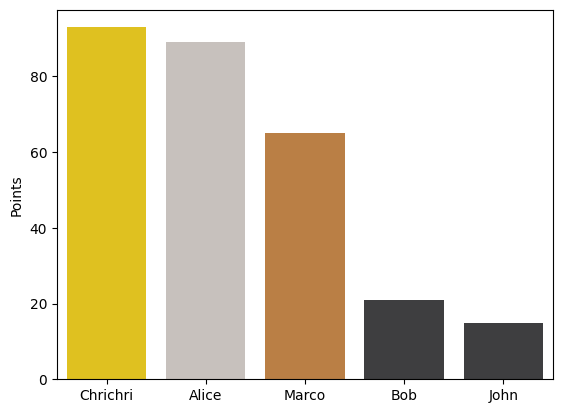

In [54]:
nb_players = len(players_g1)

medal_colors_palette = sns.color_palette(['#FFD700', '#C9C0BB', '#CD7F32'] + (nb_players - 3)*['#3E3E40'])

sns.barplot(x=points_df.index, y=points_df.Points, palette=medal_colors_palette)
plt.xlabel('')
plt.show()